In [276]:
import pandas as pd
from bokeh.io import push_notebook, show, output_notebook
from bokeh.layouts import row
from bokeh.plotting import figure
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
output_notebook()

Loading BokehJS ...

# Setting up Information about the Datasets

In [411]:
experiment_types = {
    0: 'Sparse Cut',
    1: 'Low Conductance Cut',
    2: 'Normalized Cut',
    3: 'greedy',
    4: 'DP Normalized Cut',
}

In [730]:
bipartite = 'Bipartite'
census = 'US Census Redistricting'
circuit = 'Circuit Simulation'
cluster = 'Clustering'
cit = 'Citation Network'
email = 'Email Network'
fe = 'Finite Elements'
fluids = 'Computational Fluids'
inf = 'Infrastructure Network'
materials = 'Duplicate Materials'
num = 'Numerical Simulation'
optimization = 'Optimization'
random = 'Random Graph'
road = 'Road Network'
soc = 'Social Network'
vsp = 'Triangle Mixture'[
z
graph_type_classes = 


graph_type = {
    'add32': circuit,
    'finance256': optimization,
    'ramage02': fluids,
    'rajat10': circuit,
    'pcrystk02': materials,
    'gupta2': optimization,
    'imdb': bipartite,
    'memplus': circuit,
    'ca-coauthors-dblp': cit, 
#    'soc-catster': soc, # not connected
#    'petster-cat-friend': soc, # not connected
#    'cit-patent': cit, # not connected
    'ca-dblp-2012': cit,
    'web-google': web,
    'web-it-2004': web,
    'soc-lastfm': soc,
    'ca-dblp-2010': cit,
    'email-EU': email,
#    'soc-flickr-und': soc, # not connected
    'soc-twitter-follows': soc,
    'soc-pokec': soc,
    'soc-flickr': soc, 
    'inf-power': inf,
    'ca-citeseer': cit,
    'inf-openflights': inf,
    'inf-roadNet-CA': inf,
    'ca-MathSciNet': cit,
    'email-enron-large': email,
    'soc-youtube-snap': soc,
    'inf-roadNet-PA': road, 
    'ca-hollywood-2009': cit,
    'soc-FourSquare': soc,
    'inf-italy-osm': road, 
    'soc-livejournal': soc, 
    'vsp_barth5_1Ksep_50in_5Kout': vsp,
    'vsp_bump2_e18_aa01_model1_crew1': vsp,
    'vsp_vibrobox_scagr7-2c_rlfddd': vsp,
    'appu': random, 
    'vsp_bcsstk30_500sep_10in_1Kout': vsp,
    'vsp_p0291_seymourl_iiasa': vsp,
#    'coAuthorsCiteseer': cit, # duplicate with ca-citeseer
#    'coPapersDBLP': cit, # duplicate with ca-coauthors-dpbl
    'vsp_model1_crew1_cr42_south31': vsp,
    'coPapersCiteseer': cit, 
    'luxembourg_osm': road, 
    'vsp_befref_fxm_2_4_air02': vsp,
    'citationCiteseer': cit, 
    'wing_nodal': num, 
    'uk': cluster, 
    'mi2010': census, 
    'smallworld': cluster,
    'fe_tooth': fe,
    'auto': num, 
    'fe_rotor': fe, 
    'coAuthorsDBLP': cit,
    'web-wikipedia2009': web,  
}

graph_names = list(graph_type.keys())

In [731]:
# count the number of times a graph appears

from collections import Counter

type_counter = Counter(graph_type.values())
type_counter

Counter({'Citation Network': 9,
         'Social Network': 7,
         'Triangle Mixture': 7,
         'Circuit Simulation': 3,
         'Web Graph': 3,
         'Infrastructure Network': 3,
         'Road Network': 3,
         'Optimization': 2,
         'Email Network': 2,
         'Numerical Simulation': 2,
         'Clustering': 2,
         'Finite Elements': 2,
         'Computational Fluids': 1,
         'Duplicate Materials': 1,
         'Bipartite': 1,
         'Random Graph': 1,
         'US Census Redistricting': 1})

In [ ]:
good_types = [
    'Citation Network',
    'Social Network',
    'Email Network',
    'Web Graph',
    'Infrastructure Network',
]
bad_types = [i for i in ]

In [732]:
keys = list(graph_type.keys())
values = list(graph_type.values())
sorted_value_index = np.argsort(values)

graph_order = [keys[i] for i in sorted_value_index]

sorted_value_index

graph_number = {keys[sorted_value_index[i]]: i for i in range(len(sorted_value_index))}
 
graph_order

graph_number

{'imdb': 0,
 'add32': 1,
 'rajat10': 2,
 'memplus': 3,
 'citationCiteseer': 4,
 'ca-hollywood-2009': 5,
 'coAuthorsDBLP': 6,
 'ca-MathSciNet': 7,
 'ca-coauthors-dblp': 8,
 'ca-dblp-2012': 9,
 'ca-citeseer': 10,
 'coPapersCiteseer': 11,
 'ca-dblp-2010': 12,
 'uk': 13,
 'smallworld': 14,
 'ramage02': 15,
 'pcrystk02': 16,
 'email-enron-large': 17,
 'email-EU': 18,
 'fe_tooth': 19,
 'fe_rotor': 20,
 'inf-openflights': 21,
 'inf-roadNet-CA': 22,
 'inf-power': 23,
 'wing_nodal': 24,
 'auto': 25,
 'gupta2': 26,
 'finance256': 27,
 'appu': 28,
 'inf-roadNet-PA': 29,
 'inf-italy-osm': 30,
 'luxembourg_osm': 31,
 'soc-youtube-snap': 32,
 'soc-flickr': 33,
 'soc-lastfm': 34,
 'soc-twitter-follows': 35,
 'soc-pokec': 36,
 'soc-livejournal': 37,
 'soc-FourSquare': 38,
 'vsp_vibrobox_scagr7-2c_rlfddd': 39,
 'vsp_bump2_e18_aa01_model1_crew1': 40,
 'vsp_barth5_1Ksep_50in_5Kout': 41,
 'vsp_model1_crew1_cr42_south31': 42,
 'vsp_p0291_seymourl_iiasa': 43,
 'vsp_bcsstk30_500sep_10in_1Kout': 44,
 'vsp_bef

In [733]:
def read_hierarchy_experiments(filename):
    df_hierarchy = pd.read_csv(filename, 
                 sep = ',', 
                 header = 0, 
                 names = ['Graph Name', 
                          'Experiment Type', 
                          'Phi', 
                          'Potential', 
                          'Parts',
                          'Time (decomp)',
                          'Time (solve)', 
                          'Value (mid)',
                          'Value'], 
                 dtype = {
                     'Graph Name': str,
                     'Experiment Type': int,
                     'Phi': float,
                     'Potential': float,
                     'Parts': int,
                     'Time (decomp)': int,
                     'Time (solve)': int,
                     'Value (mid)': float,
                     'Value': float,
                 },
                )

    

    df_hierarchy['Experiment Type'] = df_hierarchy['Experiment Type'].map(experiment_types)
    df_hierarchy['Time'] = (df_hierarchy['Time (decomp)'] + df_hierarchy['Time (solve)']) / 1000.0
    df_hierarchy['Algorithm Name'] = df_hierarchy['Experiment Type'] + '-' + df_hierarchy['Phi'].astype(str)
    #df_hierarchy['Type'] = df_hierarchy['Graph Name'].map(graph_type)
    #df_hierarchy['Graph Number'] = df_hierarchy['Graph Name'].map(graph_number)

    return df_hierarchy

In [734]:
def read_comparison_experiments(filename):
    df_comparison = pd.read_csv(filename, 
                           sep=',',
                           header=0,
                           names = ['Graph Name',
                                    'Experiment Type',
                                    'Parts',
                                    'Time',
                                    'Value',
                                   ],
                            dtype = {
                                'Graph Name': str,
                                'Experiment Type': str,
                                'Parts': int,
                                'Time': float,
                                'Value': float,
                            }
                           )

    df_comparison['Algorithm Name'] = df_comparison['Experiment Type']
    #df_comparison['Type'] = df_comparison['Graph Name'].map(graph_type)
    #df_comparison['Graph Number'] = df_comparison['Graph Name'].map(graph_number)


    return df_comparison

In [735]:
def read_experiments(comparison_filename, hierarchy_filename):
    df_comparison = pd.DataFrame()
    df_hierarchy = pd.DataFrame()
    
    if comparison_filename is not None:
        df_comparison = read_comparison_experiments(comparison_filename)

    if hierarchy_filename is not None:
        df_hierarchy = read_hierarchy_experiments(hierarchy_filename)

    if (comparison_filename is not None) and (hierarchy_filename is not None):
        df = pd.merge(left=df_hierarchy, right=df_comparison, how = 'outer')
    elif comparison_filename is not None:
        df = df_comparison
    elif hierarchy_filename is not None:
        df = df_hierarchy

    df = df[df['Graph Name'].isin(graph_names)]

    df['Type'] = df['Graph Name'].map(graph_type)
    df['Graph Number'] = df['Graph Name'].map(graph_number)

    return df

In [716]:
df = read_experiments('./data/comparison-experiments-28-jan.csv', './data/hierarchy-experiments-autotune-30-jan.csv')
df

Graph Name Experiment Type  Phi  Potential  Parts  Time (decomp)  \
0           rajat10          greedy    0     0.0001      2            152   
1           rajat10          greedy    0     0.0001      4            152   
2           rajat10          greedy    0     0.0001      8            152   
3           rajat10          greedy    0     0.0001     16            152   
4           rajat10          greedy    0     0.0001     32            152   
...             ...             ...  ...        ...    ...            ...   
4346  coAuthorsDBLP           kahip  NaN        NaN     64            NaN   
4347  coAuthorsDBLP         graclus  NaN        NaN     64            NaN   
4348  coAuthorsDBLP           metis  NaN        NaN    128            NaN   
4349  coAuthorsDBLP           kahip  NaN        NaN    128            NaN   
4350  coAuthorsDBLP         graclus  NaN        NaN    128            NaN   

      Time (solve)  Value (mid)      Value     Time Algorithm Name  \
0               13   0.00790649 0.00628764    0.165     greedy-0.0   
1               16    0.0309104  0.0275902    0.168     greedy-0.0   
2               25     0.109857  0.0926113    0.177     greedy-0.0   
3               48     0.365344   0.314464      0.2     greedy-0.0   
4               91      1.10305   0.961139    0.243     greedy-0.0   
...            ...          ...        ...      ...            ...   
4346           NaN          NaN    10.4298  1.98479          kahip   
4347           NaN          NaN    8.67872   2.2187        graclus   
4348           NaN          NaN    24.6518 0.625916          metis   
4349           NaN          NaN    22.3168  2.23397          kahip   
4350           NaN          NaN    18.4514  4.31489        graclus   

                    Type  Graph Number  
0     Circuit Simulation             2  
1     Circuit Simulation             2  
2     Circuit Simulation             2  
3     Circuit Simulation             2  
4     Circuit Simulation             2  
...                  ...           ...  
4346    Citation Network             6  
4347    Citation Network             6  
4348    Citation Network             6  
4349    Citation Network             6  
4350    Citation Network             6  

[4288 rows x 13 columns]

In [717]:
df['Graph Name'].unique()

array(['rajat10', 'pcrystk02', 'memplus', 'ramage02', 'add32',
       'finance256', 'imdb', 'gupta2', 'ca-coauthors-dblp',
       'ca-dblp-2012', 'web-it-2004', 'web-google', 'ca-dblp-2010',
       'email-EU', 'soc-twitter-follows', 'soc-pokec', 'soc-flickr',
       'inf-power', 'ca-citeseer', 'inf-roadNet-CA', 'ca-MathSciNet',
       'email-enron-large', 'soc-youtube-snap', 'inf-roadNet-PA',
       'ca-hollywood-2009', 'soc-FourSquare', 'inf-italy-osm',
       'web-wikipedia2009', 'soc-lastfm', 'soc-livejournal',
       'vsp_barth5_1Ksep_50in_5Kout', 'vsp_bump2_e18_aa01_model1_crew1',
       'vsp_vibrobox_scagr7-2c_rlfddd', 'appu',
       'vsp_bcsstk30_500sep_10in_1Kout', 'vsp_model1_crew1_cr42_south31',
       'coPapersCiteseer', 'luxembourg_osm', 'vsp_befref_fxm_2_4_air02',
       'citationCiteseer', 'wing_nodal', 'uk', 'mi2010', 'smallworld',
       'fe_tooth', 'auto', 'vsp_p0291_seymourl_iiasa', 'fe_rotor',
       'coAuthorsDBLP', 'inf-openflights'], dtype=object)

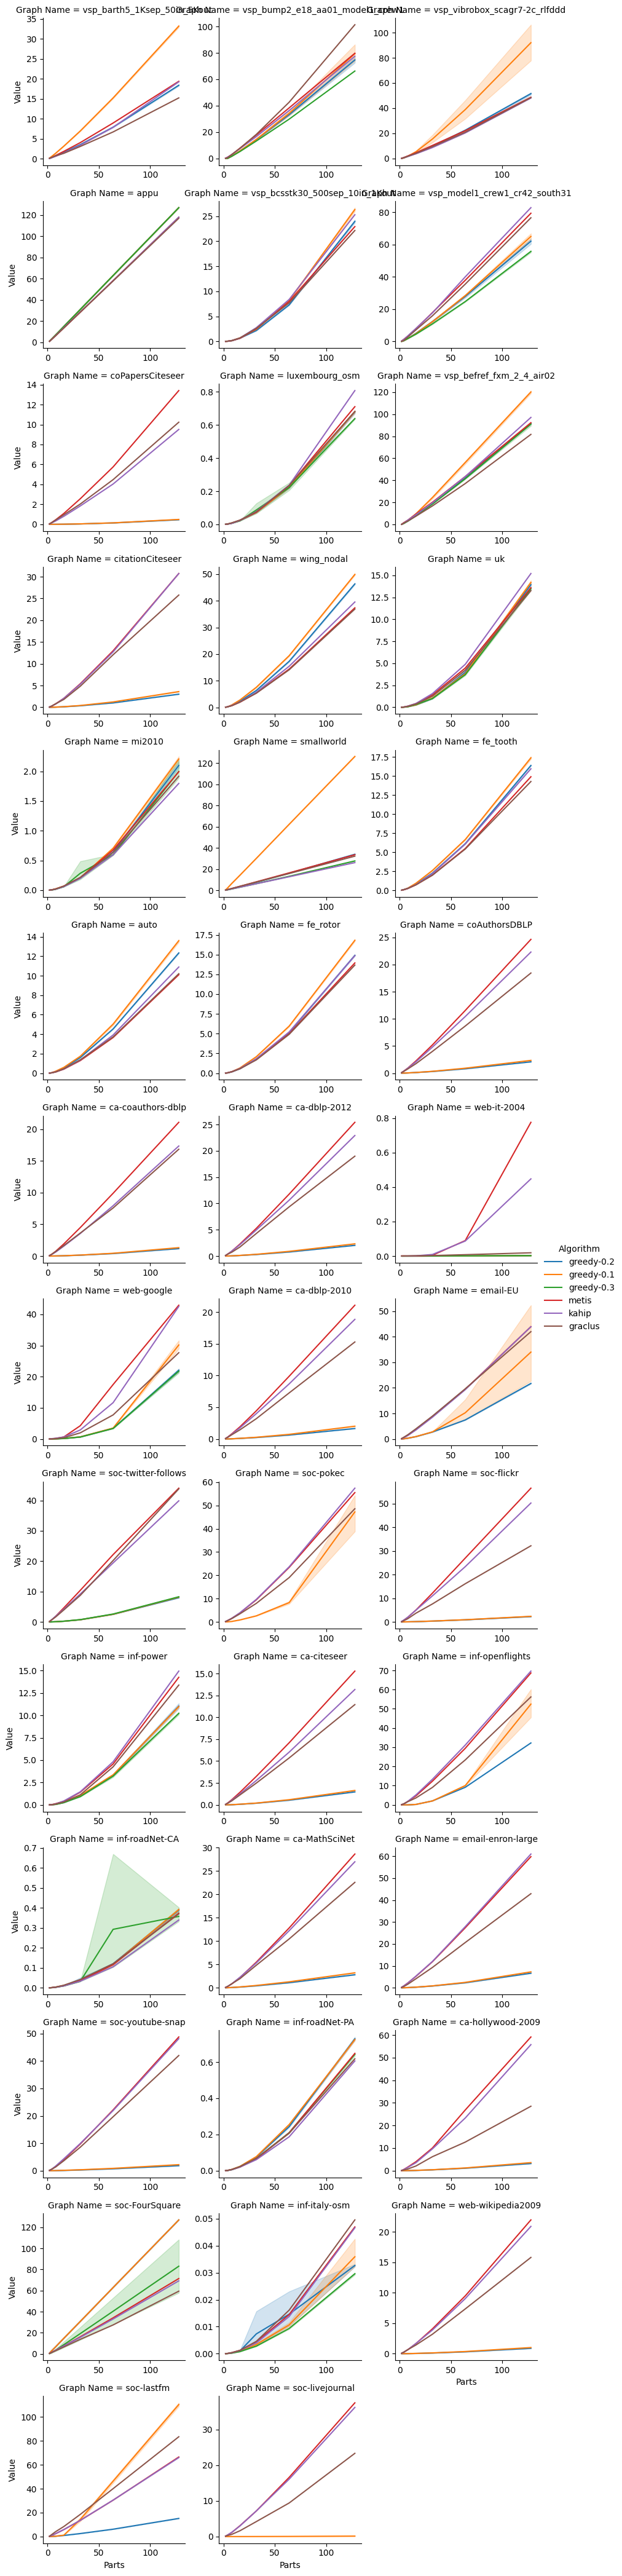

In [539]:
g = sns.FacetGrid(df, col = 'Graph Name', hue='Algorithm Name', sharey = False, sharex = False, col_wrap=3)
g.map(sns.lineplot, 'Parts', 'Value')
g.add_legend(title='Algorithm')
fig = g.fig
fig.savefig("other-graphs-quality.pdf") 
g

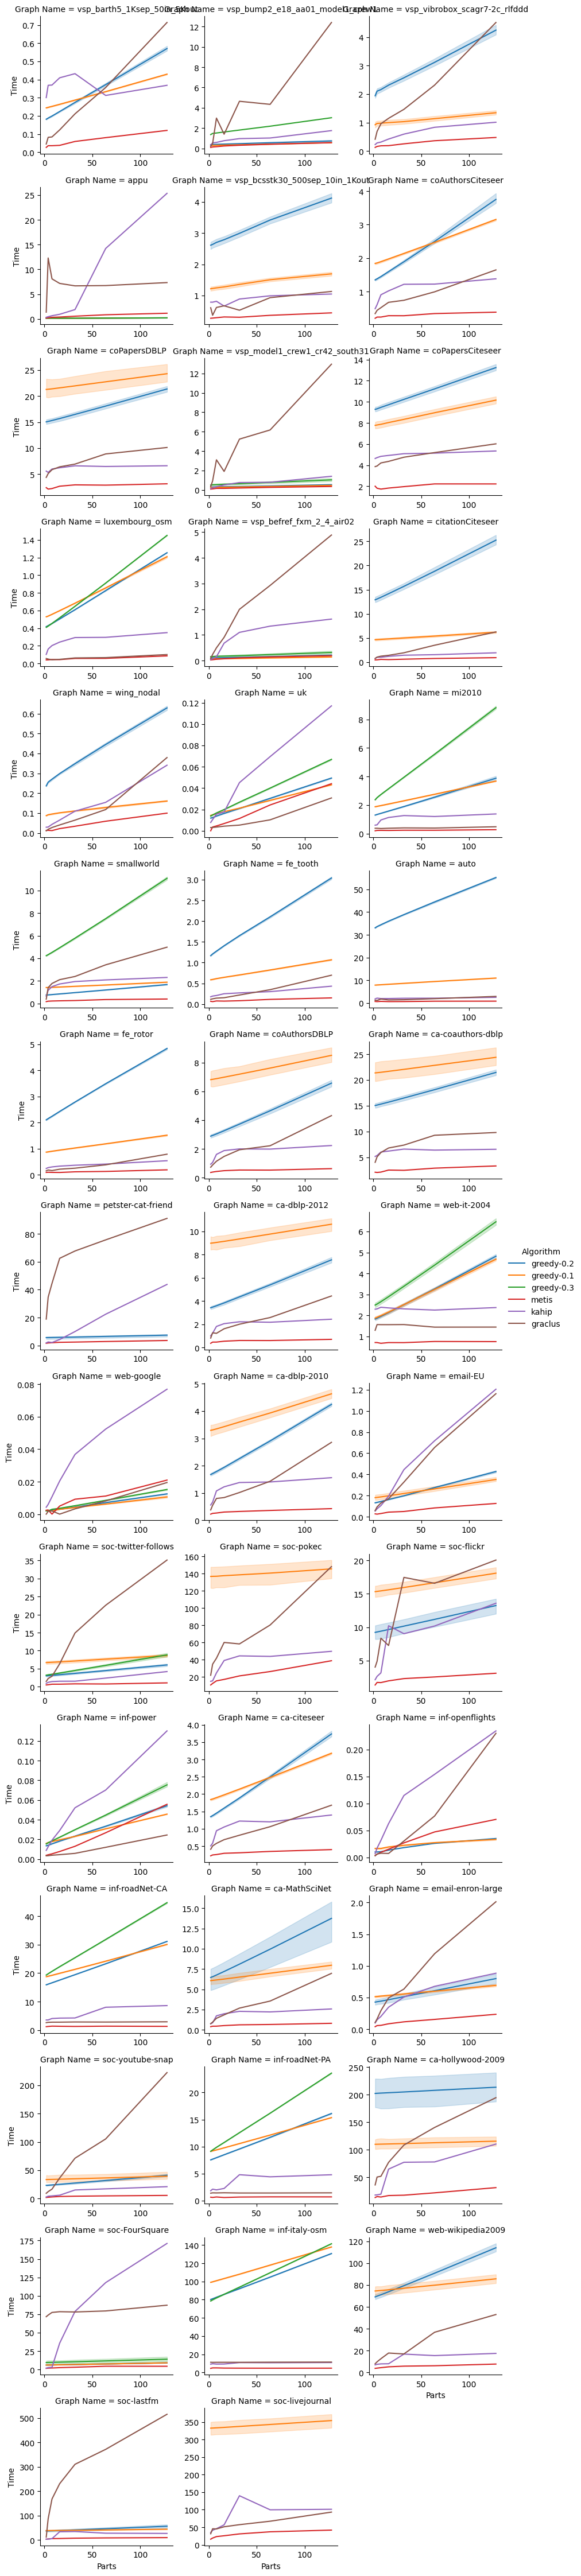

In [242]:
g = sns.FacetGrid(df, col = 'Graph Name', hue='Algorithm Name', sharey = False, sharex = False, col_wrap=3)
g.map(sns.lineplot, 'Parts', 'Time')
g.add_legend(title='Algorithm')
fig = g.fig
fig.savefig("other-graphs-time.pdf") 
g

# The graphs from the Graclus Paper

In [109]:
df_hierarchy = read_hierarchy_experiments('./data/hierarchy-experiments-graclus-22-jan.csv')
df_comparison = read_comparison_experiments('./data/comparison-experiments-graclus-22-jan.csv')
df = pd.merge(left = df_hierarchy, right = df_comparison, how='outer')

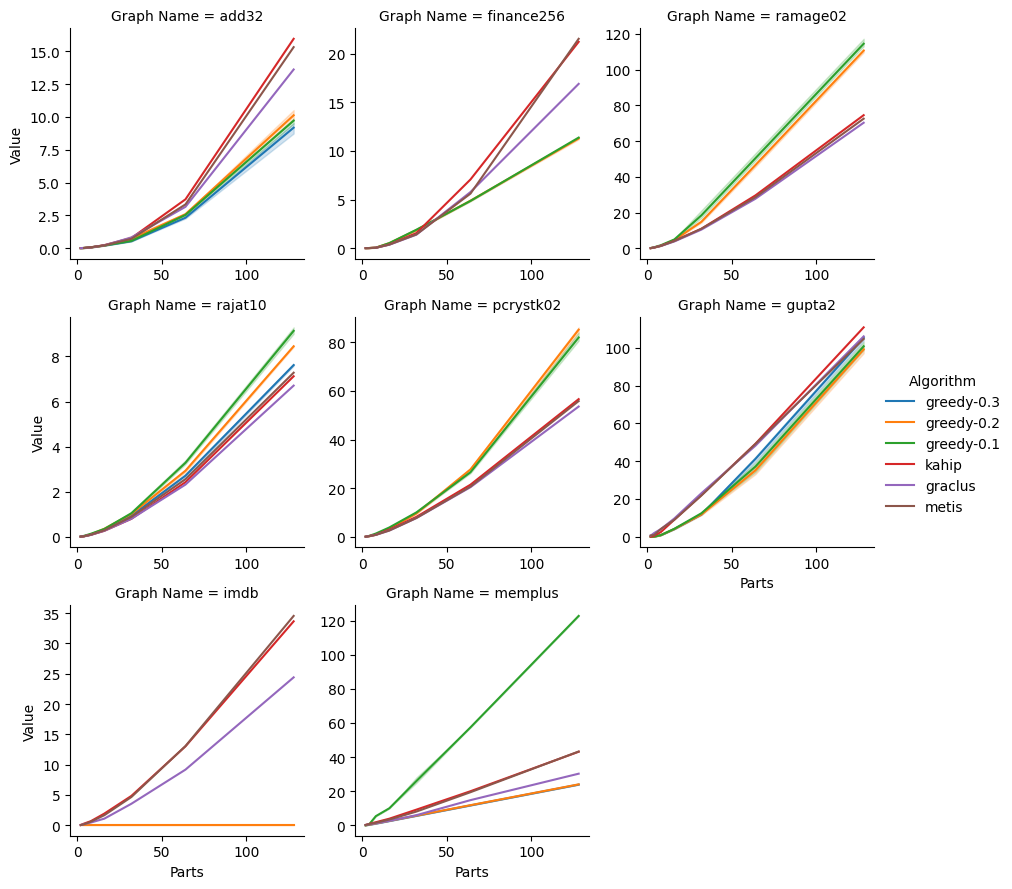

In [77]:
g = sns.FacetGrid(df, col = 'Graph Name', hue='Algorithm Name', sharey = False, sharex = False, col_wrap=3)
g.map(sns.lineplot, 'Parts', 'Value')
g.add_legend(title='Algorithm')
fig = g.fig
fig.savefig("graclus-quality.pdf") 
g

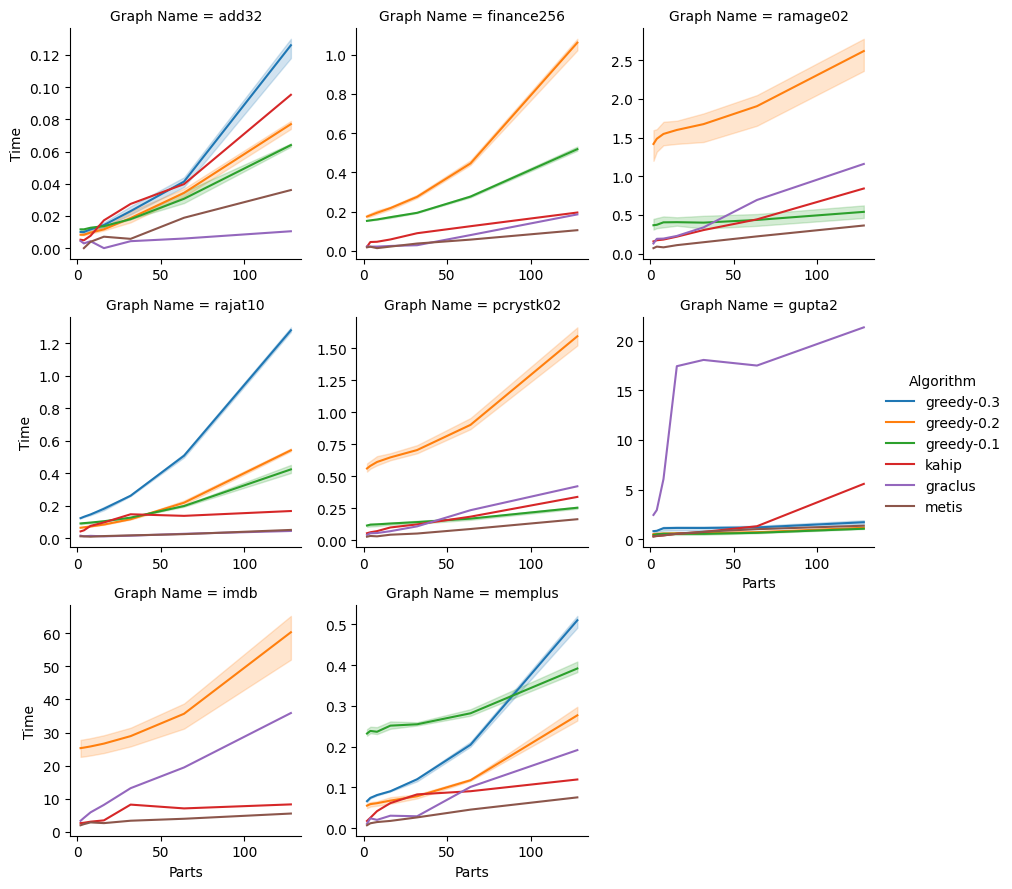

In [76]:
g = sns.FacetGrid(df, col = 'Graph Name', hue='Algorithm Name', sharey = False, sharex = False, col_wrap=3)
g.map(sns.lineplot, 'Parts', 'Time')
g.add_legend(title='Algorithm')
fig = g.fig
fig.savefig("graclus-time.pdf") 
g

# Another run on Graclus

In [154]:
df_hierarchy = read_hierarchy_experiments('./data/hierarchy-experiments-graclus-24-jan.csv')
df_comparison = read_comparison_experiments('./data/comparison-experiments-graclus-22-jan.csv')
df = pd.merge(left = df_hierarchy, right = df_comparison, how='outer')
df['Graph Name'].unique()

array(['add32', 'finance256', 'ramage02', 'rajat10', 'pcrystk02',
       'gupta2', 'imdb', 'memplus'], dtype=object)

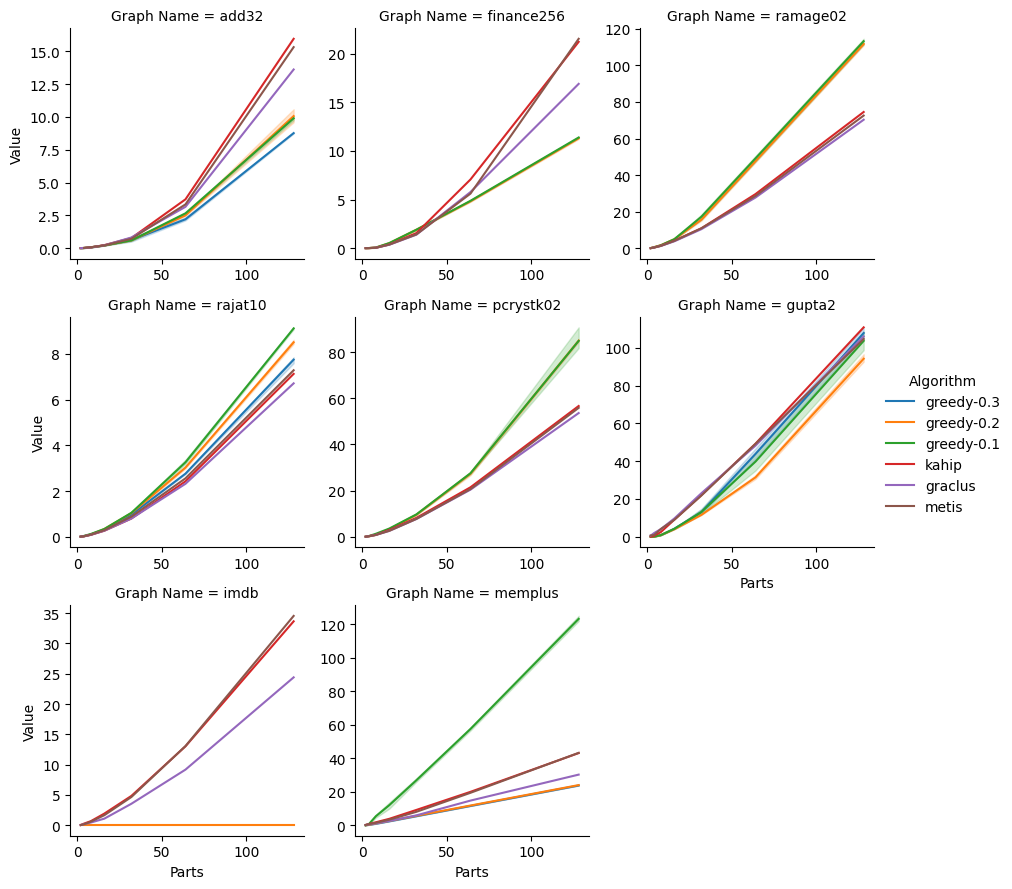

In [87]:
g = sns.FacetGrid(df, col = 'Graph Name', hue='Algorithm Name', sharey = False, sharex = False, col_wrap=3)
g.map(sns.lineplot, 'Parts', 'Value')
g.add_legend(title='Algorithm')
fig = g.fig
fig.savefig("graclus-quality.pdf") 
g

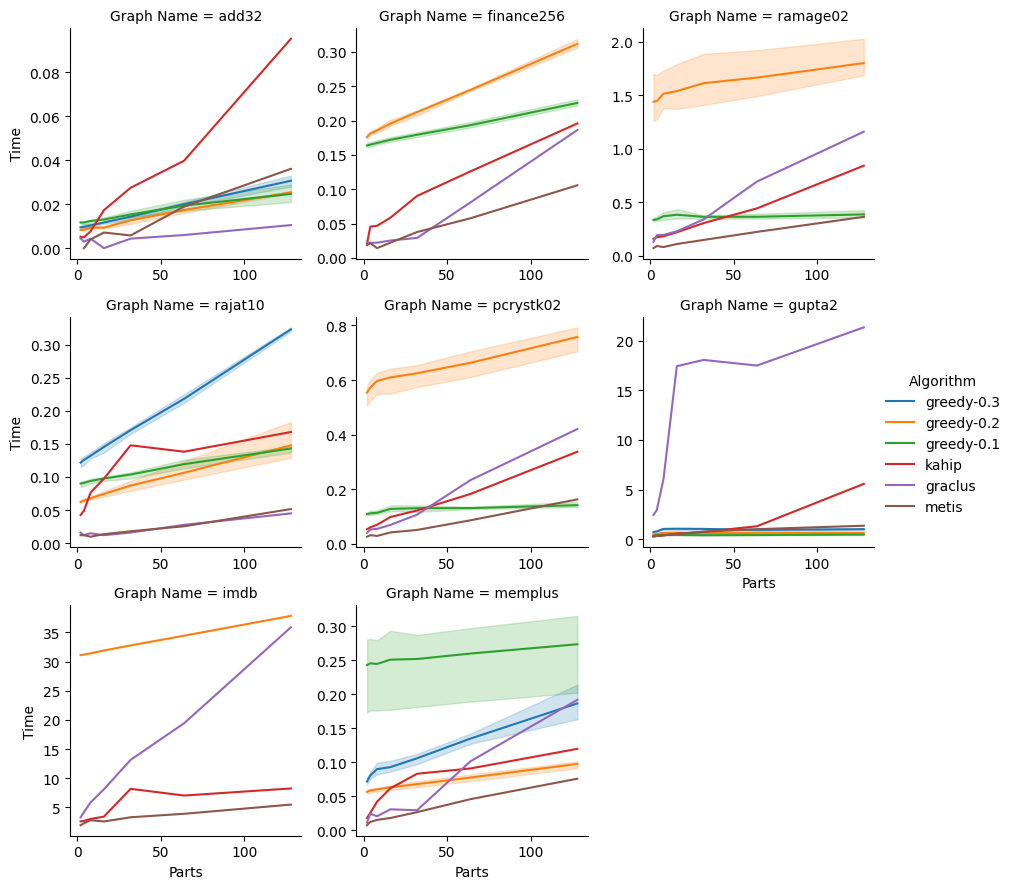

In [88]:
g = sns.FacetGrid(df, col = 'Graph Name', hue='Algorithm Name', sharey = False, sharex = False, col_wrap=3)
g.map(sns.lineplot, 'Parts', 'Time')
g.add_legend(title='Algorithm')
fig = g.fig
fig.savefig("graclus-time.pdf") 
g

In [89]:
df

Graph Name Experiment Type  Phi  Potential  Parts  Time (decomp)  \
0        add32          greedy  0.3     0.0001      4            9.0   
1        add32          greedy  0.3     0.0001      8            9.0   
2        add32          greedy  0.3     0.0001     16            9.0   
3        add32          greedy  0.3     0.0001     32            9.0   
4        add32          greedy  0.3     0.0001     64            9.0   
..         ...             ...  ...        ...    ...            ...   
546    memplus           kahip  NaN        NaN     64            NaN   
547    memplus         graclus  NaN        NaN     64            NaN   
548    memplus           metis  NaN        NaN    128            NaN   
549    memplus           kahip  NaN        NaN    128            NaN   
550    memplus         graclus  NaN        NaN    128            NaN   

     Time (solve)  Value (mid)      Value      Time Algorithm Name  
0             0.0     0.017443   0.012557  0.009000     greedy-0.3  
1             1.0     0.075960   0.067882  0.010000     greedy-0.3  
2             3.0     0.217038   0.208785  0.012000     greedy-0.3  
3             6.0     0.566988   0.502130  0.015000     greedy-0.3  
4            12.0     2.492950   2.120250  0.021000     greedy-0.3  
..            ...          ...        ...       ...            ...  
546           NaN          NaN  20.017000  0.090705          kahip  
547           NaN          NaN  14.792900  0.101271        graclus  
548           NaN          NaN  43.284800  0.075597          metis  
549           NaN          NaN  43.147000  0.119532          kahip  
550           NaN          NaN  30.290000  0.191654        graclus  

[551 rows x 11 columns]

In [246]:
df['Relative (Metis)'] = df['Value']

# Chosen name
chosen_name = 'metis'

# Filter rows with the chosen name
chosen_rows = df[df['Algorithm Name'] == chosen_name]

# Check if the chosen rows exist
if not chosen_rows.empty:
    # Iterate over the chosen rows and divide each row of the DataFrame
    for _, chosen_row in chosen_rows.iterrows():
        chosen_number = chosen_row['Parts']
        chosen_name = chosen_row['Graph Name']
        chosen_value = chosen_row['Value']

        # Divide each row by the chosen row with the same number
        df.loc[(df['Parts'] == chosen_number) & (df['Graph Name'] == chosen_name), 'Relative (Metis)'] /= chosen_value

    #print(df)
else:
    print("No rows found with the chosen name.")

df

Graph Name Experiment Type  Phi  Potential  Parts  \
0     vsp_barth5_1Ksep_50in_5Kout          greedy  0.2     0.0001      2   
1     vsp_barth5_1Ksep_50in_5Kout          greedy  0.2     0.0001      4   
2     vsp_barth5_1Ksep_50in_5Kout          greedy  0.2     0.0001      8   
3     vsp_barth5_1Ksep_50in_5Kout          greedy  0.2     0.0001     16   
4     vsp_barth5_1Ksep_50in_5Kout          greedy  0.2     0.0001     32   
...                           ...             ...  ...        ...    ...   
7734                coAuthorsDBLP           kahip  NaN        NaN     64   
7735                coAuthorsDBLP         graclus  NaN        NaN     64   
7736                coAuthorsDBLP           metis  NaN        NaN    128   
7737                coAuthorsDBLP           kahip  NaN        NaN    128   
7738                coAuthorsDBLP         graclus  NaN        NaN    128   

      Time (decomp)  Time (solve)  Value (mid)      Value      Time  \
0             178.0           9.0     0.106006   0.097247  0.187000   
1             178.0          15.0     0.324515   0.293794  0.193000   
2             178.0          27.0     0.792672   0.707581  0.205000   
3             178.0          51.0     1.794610   1.606200  0.229000   
4             178.0         105.0     3.936350   3.578770  0.283000   
...             ...           ...          ...        ...       ...   
7734            NaN           NaN          NaN  10.429800  1.984790   
7735            NaN           NaN          NaN   8.678720  2.218700   
7736            NaN           NaN          NaN  24.651800  0.625916   
7737            NaN           NaN          NaN  22.316800  2.233970   
7738            NaN           NaN          NaN  18.451400  4.314890   

     Algorithm Name              Type  Relative (Metis)  
0        greedy-0.2  Triangle Mixture          0.970233  
1        greedy-0.2  Triangle Mixture          0.935852  
2        greedy-0.2  Triangle Mixture          0.863363  
3        greedy-0.2  Triangle Mixture          0.866848  
4        greedy-0.2  Triangle Mixture          0.887557  
...             ...               ...               ...  
7734          kahip  Citation Network          0.903076  
7735        graclus  Citation Network          0.751456  
7736          metis  Citation Network          1.000000  
7737          kahip  Citation Network          0.905281  
7738        graclus  Citation Network          0.748481  

[7739 rows x 13 columns]

In [247]:
df['Relative (Graclus)'] = df['Value']

# Chosen name
chosen_name = 'graclus'

# Filter rows with the chosen name
chosen_rows = df[df['Algorithm Name'] == chosen_name]

# Check if the chosen rows exist
if not chosen_rows.empty:
    # Iterate over the chosen rows and divide each row of the DataFrame
    for _, chosen_row in chosen_rows.iterrows():
        chosen_number = chosen_row['Parts']
        chosen_name = chosen_row['Graph Name']
        chosen_value = chosen_row['Value']

        # Divide each row by the chosen row with the same number
        df.loc[(df['Parts'] == chosen_number) & (df['Graph Name'] == chosen_name), 'Relative (Graclus)'] /= chosen_value

    #print(df)
else:
    print("No rows found with the chosen name.")

df

Graph Name Experiment Type  Phi  Potential  Parts  \
0     vsp_barth5_1Ksep_50in_5Kout          greedy  0.2     0.0001      2   
1     vsp_barth5_1Ksep_50in_5Kout          greedy  0.2     0.0001      4   
2     vsp_barth5_1Ksep_50in_5Kout          greedy  0.2     0.0001      8   
3     vsp_barth5_1Ksep_50in_5Kout          greedy  0.2     0.0001     16   
4     vsp_barth5_1Ksep_50in_5Kout          greedy  0.2     0.0001     32   
...                           ...             ...  ...        ...    ...   
7734                coAuthorsDBLP           kahip  NaN        NaN     64   
7735                coAuthorsDBLP         graclus  NaN        NaN     64   
7736                coAuthorsDBLP           metis  NaN        NaN    128   
7737                coAuthorsDBLP           kahip  NaN        NaN    128   
7738                coAuthorsDBLP         graclus  NaN        NaN    128   

      Time (decomp)  Time (solve)  Value (mid)      Value      Time  \
0             178.0           9.0     0.106006   0.097247  0.187000   
1             178.0          15.0     0.324515   0.293794  0.193000   
2             178.0          27.0     0.792672   0.707581  0.205000   
3             178.0          51.0     1.794610   1.606200  0.229000   
4             178.0         105.0     3.936350   3.578770  0.283000   
...             ...           ...          ...        ...       ...   
7734            NaN           NaN          NaN  10.429800  1.984790   
7735            NaN           NaN          NaN   8.678720  2.218700   
7736            NaN           NaN          NaN  24.651800  0.625916   
7737            NaN           NaN          NaN  22.316800  2.233970   
7738            NaN           NaN          NaN  18.451400  4.314890   

     Algorithm Name              Type  Relative (Metis)  Relative (Graclus)  
0        greedy-0.2  Triangle Mixture          0.970233            0.981533  
1        greedy-0.2  Triangle Mixture          0.935852            0.940231  
2        greedy-0.2  Triangle Mixture          0.863363            0.960973  
3        greedy-0.2  Triangle Mixture          0.866848            1.179737  
4        greedy-0.2  Triangle Mixture          0.887557            1.164869  
...             ...               ...               ...                 ...  
7734          kahip  Citation Network          0.903076            1.201767  
7735        graclus  Citation Network          0.751456            1.000000  
7736          metis  Citation Network          1.000000            1.336040  
7737          kahip  Citation Network          0.905281            1.209491  
7738        graclus  Citation Network          0.748481            1.000000  

[7739 rows x 14 columns]

In [248]:
df.groupby(['Algorithm Name', 'Type', 'Parts'])['Relative (Graclus)'].mean().unstack()

Parts                                        2         4         8    \
Algorithm Name Type                                                    
graclus        Citation Network         1.000000  1.000000  1.000000   
               Clustering               1.000000  1.000000  1.000000   
               Email Network            1.000000  1.000000  1.000000   
               Finite Elements          1.000000  1.000000  1.000000   
               Infrastructure Network   1.000000  1.000000  1.000000   
               Numerical Simulation     1.000000  1.000000  1.000000   
               Random Graph             1.000000  1.000000  1.000000   
               Road Network             1.000000  1.000000  1.000000   
               Social Network           1.000000  1.000000  1.000000   
               Triangle Mixture         1.000000  1.000000  1.000000   
               US Census Redistricting  1.000000  1.000000  1.000000   
               Web Graph                1.000000  1.000000  1.000000   
greedy-0.1     Citation Network         0.033835  0.039400  0.048707   
               Clustering               1.163413  1.919608  2.202992   
               Email Network            0.093747  0.101711  0.133621   
               Finite Elements          1.152905  0.958669  1.081996   
               Infrastructure Network   0.577641  0.578349  0.543534   
               Numerical Simulation     0.797713  1.270084  1.518022   
               Random Graph             1.087032  1.154149  1.128896   
               Road Network             0.795998  0.855482  0.872815   
               Social Network           0.326813  0.410296  0.424892   
               Triangle Mixture         0.743507  0.833363  1.038094   
               US Census Redistricting  0.278913  0.899655  1.131610   
               Web Graph                0.956810  0.480678  0.392746   
greedy-0.2     Citation Network         0.030782  0.033797  0.043174   
               Clustering               0.757804  0.796870  0.792137   
               Email Network            0.089311  0.094374  0.129294   
               Finite Elements          0.974755  0.909278  0.979049   
               Infrastructure Network   0.751926  0.759859  0.679586   
               Numerical Simulation     0.801763  1.005213  1.152432   
               Random Graph             1.087032  1.154149  1.128896   
               Road Network             0.789626  0.772594  0.781725   
               Social Network           0.453330  0.555582  0.555339   
               Triangle Mixture         0.589221  0.676577  0.834861   
               US Census Redistricting  0.134474  0.665375  0.906116   
               Web Graph                0.881973  0.445270  0.382636   
greedy-0.3     Clustering               0.658374  0.703282  0.684356   
               Infrastructure Network   0.707858  0.760346  0.645641   
               Random Graph             1.087032  1.154149  1.128896   
               Road Network             0.677728  0.643530  0.695104   
               Social Network           0.327025  0.464142  0.619753   
               Triangle Mixture         0.803174  0.743804  0.760374   
               US Census Redistricting  0.089816  0.572681  0.785159   
               Web Graph                0.845580  0.432782  0.353655   
kahip          Citation Network         0.973076  1.047932  1.115965   
               Clustering               1.024384  0.980620  1.010766   
               Email Network            1.157539  1.194892  1.063327   
               Finite Elements          0.942550  0.994519  1.001273   
               Infrastructure Network   1.047264  0.963107  0.999271   
               Numerical Simulation     1.010003  1.062984  1.107151   
               Random Graph             0.965583  1.031770  1.028972   
               Road Network             0.784625  0.761459  0.753521   
               Social Network           1.929041  1.172207  1.266315   
               Triangle Mixture         

In [249]:
gmean1 = lambda x: x.product() ** (1 / float(len(x)))
df.groupby(['Algorithm Name', 'Type', 'Parts'])['Relative (Graclus)'].agg(gmean1).unstack()

Parts                                        2         4         8    \
Algorithm Name Type                                                    
graclus        Citation Network         1.000000  1.000000  1.000000   
               Clustering               1.000000  1.000000  1.000000   
               Email Network            1.000000  1.000000  1.000000   
               Finite Elements          1.000000  1.000000  1.000000   
               Infrastructure Network   1.000000  1.000000  1.000000   
               Numerical Simulation     1.000000  1.000000  1.000000   
               Random Graph             1.000000  1.000000  1.000000   
               Road Network             1.000000  1.000000  1.000000   
               Social Network           1.000000  1.000000  1.000000   
               Triangle Mixture         1.000000  1.000000  1.000000   
               US Census Redistricting  1.000000  1.000000  1.000000   
               Web Graph                1.000000  1.000000  1.000000   
greedy-0.1     Citation Network         0.030023  0.034553  0.043716   
               Clustering               0.973515  1.468642  1.593083   
               Email Network            0.071869  0.086447  0.111852   
               Finite Elements          1.117268  0.945909  1.077260   
               Infrastructure Network   0.000000  0.000000  0.000000   
               Numerical Simulation     0.782705  1.242732  1.507258   
               Random Graph             1.087032  1.154149  1.128896   
               Road Network             0.776633  0.846852  0.851384   
               Social Network           0.028192  0.043399  0.061088   
               Triangle Mixture         0.520824  0.675335  0.954842   
               US Census Redistricting  0.151501  0.865378  1.126772   
               Web Graph                0.950335  0.479275  0.392350   
greedy-0.2     Citation Network         0.028191  0.030778  0.038913   
               Clustering               0.694396  0.787253  0.778918   
               Email Network            0.066162  0.074097  0.105365   
               Finite Elements          0.968054  0.891282  0.975447   
               Infrastructure Network   0.000000  0.000000  0.000000   
               Numerical Simulation     0.779173  0.998985  1.146361   
               Random Graph             1.087032  1.154149  1.128896   
               Road Network             0.756171  0.766919  0.763608   
               Social Network           0.000000  0.000000  0.000000   
               Triangle Mixture         0.427568  0.601092  0.816750   
               US Census Redistricting  0.108111  0.660819  0.904922   
               Web Graph                0.866299  0.444739  0.381443   
greedy-0.3     Clustering               0.626533  0.694146  0.676089   
               Infrastructure Network   0.682708  0.749666  0.639797   
               Random Graph             1.087032  1.154149  1.128896   
               Road Network             0.649335  0.638040  0.678390   
               Social Network           0.140216  0.169357  0.224647   
               Triangle Mixture         0.790116  0.704098  0.742760   
               US Census Redistricting  0.089555  0.571576  0.783871   
               Web Graph                0.839723  0.432007  0.353325   
kahip          Citation Network         0.965110  1.033286  1.083834   
               Clustering               1.007178  0.964242  0.987100   
               Email Network            1.063040  1.102486  1.033291   
               Finite Elements          0.942377  0.994267  1.001152   
               Infrastructure Network   1.034010  0.943157  0.980396   
               Numerical Simulation     1.008095  1.062771  1.106248   
               Random Graph             0.965583  1.031770  1.028972   
               Road Network             0.773057  0.761024  0.750300   
               Social Network           1.402604  1.133885  1.231307   
               Triangle Mixture         

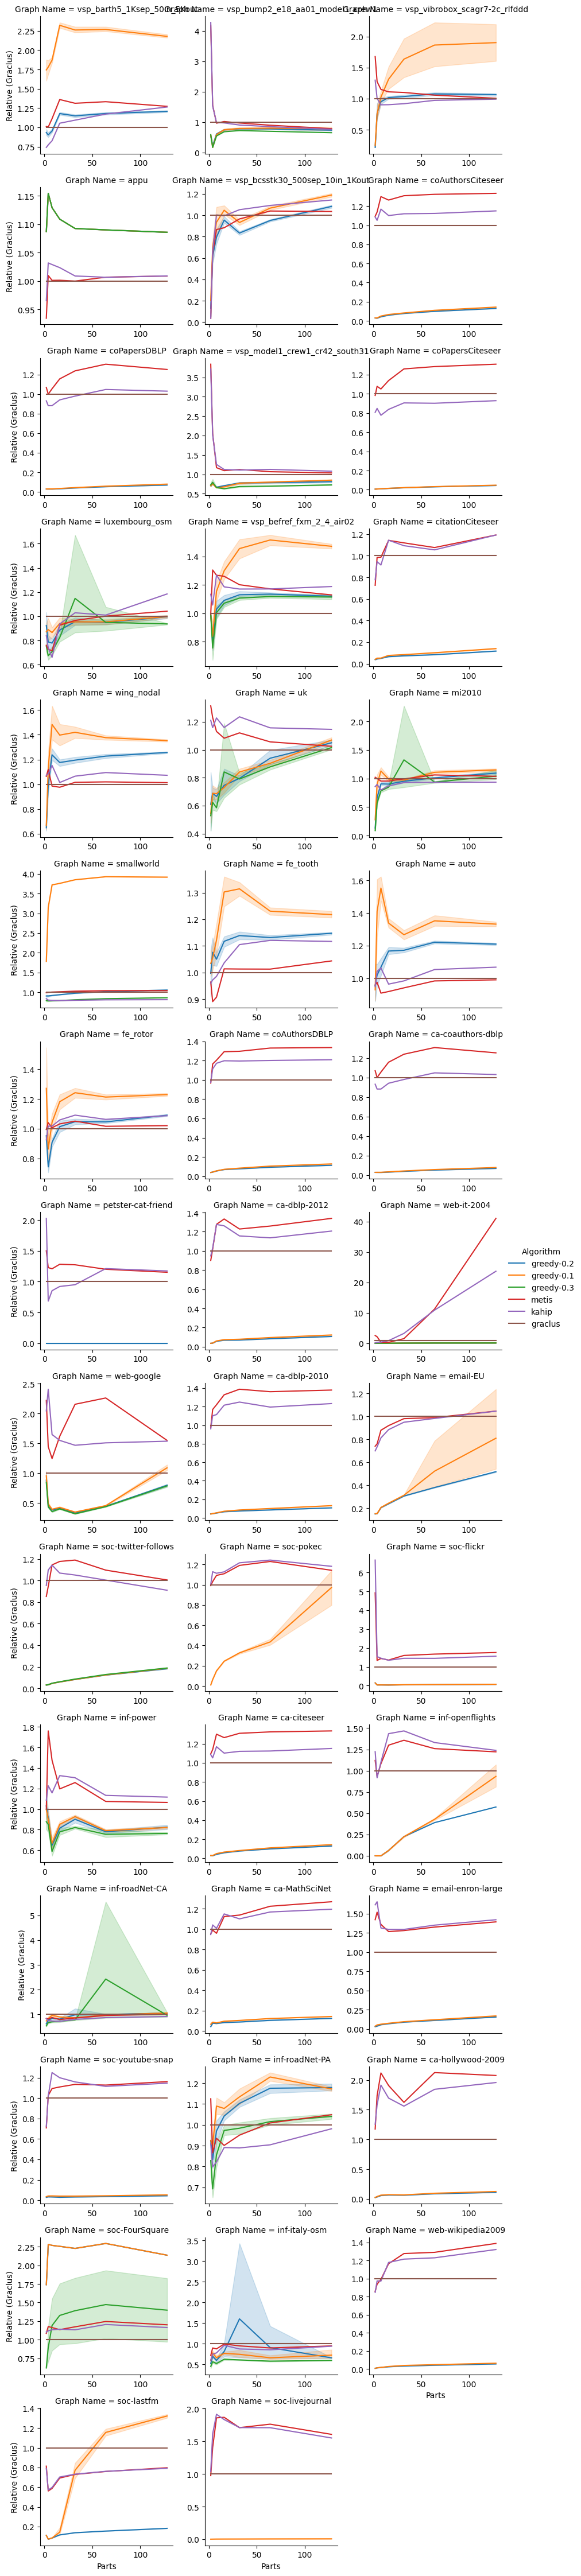

In [250]:
g = sns.FacetGrid(df, col = 'Graph Name', hue='Algorithm Name', sharey = False, sharex = False, col_wrap=3)
g.map(sns.lineplot, 'Parts', 'Relative (Graclus)')
g.add_legend(title='Algorithm')

# Barplot

In [736]:
#df_hierarchy = read_hierarchy_experiments('./data/hierarchy-experiments-26-jan.csv')
#df_comparison = read_comparison_experiments('./data/comparison-experiments-28-jan.csv') 
# df_hierarchy_graclus = read_hierarchy_experiments('./data/hierarchy-experiments-graclus-22-jan.csv')
# df_comparison_graclus = read_comparison_experiments('./data/comparison-experiments-graclus-22-jan.csv')
df = read_experiments('./data/comparison-experiments-28-jan.csv', './data/hierarchy-experiments-autotune-30-jan.csv')
df_graclus = read_experiments('./data/comparison-experiments-graclus-29-jan.csv', None)
df = pd.concat([df, df_graclus], ignore_index=True)

# df_hierarchy = pd.concat([df_hierarchy, df_hierarchy_graclus])
# df_comparison = pd.concat([df_comparison, df_comparison_graclus])

#df = pd.merge(left = df_hierarchy, right = df_comparison, how='outer')
df

Graph Name Experiment Type  Phi  Potential  Parts  Time (decomp)  \
0       rajat10          greedy    0     0.0001      2            152   
1       rajat10          greedy    0     0.0001      4            152   
2       rajat10          greedy    0     0.0001      8            152   
3       rajat10          greedy    0     0.0001     16            152   
4       rajat10          greedy    0     0.0001     32            152   
...         ...             ...  ...        ...    ...            ...   
4451     gupta2           kahip  NaN        NaN     64            NaN   
4452     gupta2         graclus  NaN        NaN     64            NaN   
4453     gupta2           metis  NaN        NaN    128            NaN   
4454     gupta2           kahip  NaN        NaN    128            NaN   
4455     gupta2         graclus  NaN        NaN    128            NaN   

      Time (solve)  Value (mid)      Value    Time Algorithm Name  \
0               13   0.00790649 0.00628764   0.165     greedy-0.0   
1               16    0.0309104  0.0275902   0.168     greedy-0.0   
2               25     0.109857  0.0926113   0.177     greedy-0.0   
3               48     0.365344   0.314464     0.2     greedy-0.0   
4               91      1.10305   0.961139   0.243     greedy-0.0   
...            ...          ...        ...     ...            ...   
4451           NaN          NaN    49.2285 4.30649          kahip   
4452           NaN          NaN    48.1985 34.2778        graclus   
4453           NaN          NaN    104.651 1.81103          metis   
4454           NaN          NaN    110.805 30.1661          kahip   
4455           NaN          NaN    106.022   40.29        graclus   

                    Type  Graph Number  
0     Circuit Simulation             2  
1     Circuit Simulation             2  
2     Circuit Simulation             2  
3     Circuit Simulation             2  
4     Circuit Simulation             2  
...                  ...           ...  
4451        Optimization            26  
4452        Optimization            26  
4453        Optimization            26  
4454        Optimization            26  
4455        Optimization            26  

[4456 rows x 13 columns]

In [737]:
# filter the rows that are 0 (not necessary anymore, since disconnected graphs are filtered)
# df = df[df['Value'] != 0.0]
# df = df[df['Graph Name'] != 'soc-Foursquare']

In [738]:
df['Relative (Graclus)'] = df['Value']

# Chosen name
chosen_name = 'graclus'

# Filter rows with the chosen name
chosen_rows = df[df['Algorithm Name'] == chosen_name]

# Check if the chosen rows exist
if not chosen_rows.empty:
    # Iterate over the chosen rows and divide each row of the DataFrame
    for _, chosen_row in chosen_rows.iterrows():
        chosen_number = chosen_row['Parts']
        chosen_name = chosen_row['Graph Name']
        chosen_value = chosen_row['Value']

        # Divide each row by the chosen row with the same number
        df.loc[(df['Parts'] == chosen_number) & (df['Graph Name'] == chosen_name), 'Relative (Graclus)'] /= chosen_value

    #print(df)
else:
    print("No rows found with the chosen name.")

df

Graph Name Experiment Type  Phi  Potential  Parts  Time (decomp)  \
0       rajat10          greedy    0     0.0001      2            152   
1       rajat10          greedy    0     0.0001      4            152   
2       rajat10          greedy    0     0.0001      8            152   
3       rajat10          greedy    0     0.0001     16            152   
4       rajat10          greedy    0     0.0001     32            152   
...         ...             ...  ...        ...    ...            ...   
4451     gupta2           kahip  NaN        NaN     64            NaN   
4452     gupta2         graclus  NaN        NaN     64            NaN   
4453     gupta2           metis  NaN        NaN    128            NaN   
4454     gupta2           kahip  NaN        NaN    128            NaN   
4455     gupta2         graclus  NaN        NaN    128            NaN   

      Time (solve)  Value (mid)      Value    Time Algorithm Name  \
0               13   0.00790649 0.00628764   0.165     greedy-0.0   
1               16    0.0309104  0.0275902   0.168     greedy-0.0   
2               25     0.109857  0.0926113   0.177     greedy-0.0   
3               48     0.365344   0.314464     0.2     greedy-0.0   
4               91      1.10305   0.961139   0.243     greedy-0.0   
...            ...          ...        ...     ...            ...   
4451           NaN          NaN    49.2285 4.30649          kahip   
4452           NaN          NaN    48.1985 34.2778        graclus   
4453           NaN          NaN    104.651 1.81103          metis   
4454           NaN          NaN    110.805 30.1661          kahip   
4455           NaN          NaN    106.022   40.29        graclus   

                    Type  Graph Number  Relative (Graclus)  
0     Circuit Simulation             2           1.1412609  
1     Circuit Simulation             2           1.1047658  
2     Circuit Simulation             2           1.0570003  
3     Circuit Simulation             2           1.1739075  
4     Circuit Simulation             2           1.2014012  
...                  ...           ...                 ...  
4451        Optimization            26             1.02137  
4452        Optimization            26                   1  
4453        Optimization            26          0.98706872  
4454        Optimization            26           1.0451133  
4455        Optimization            26                   1  

[4456 rows x 14 columns]

In [739]:
pd.set_option('display.max_rows', 500)

In [740]:
print(df.groupby(['Algorithm Name', 'Type', 'Parts'])['Relative (Graclus)'].mean().unstack().to_latex())

\begin{tabular}{llrrrrrrr}
\toprule
 & Parts & 2 & 4 & 8 & 16 & 32 & 64 & 128 \\
Algorithm Name & Type &  &  &  &  &  &  &  \\
\midrule
\multirow[t]{17}{*}{graclus} & Bipartite & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 \\
 & Circuit Simulation & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 \\
 & Citation Network & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 \\
 & Clustering & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 \\
 & Computational Fluids & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 \\
 & Duplicate Materials & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 \\
 & Email Network & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 \\
 & Finite Elements & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 \\
 & Infrastructure Network & 1.000000 & 1.000

In [741]:
gmean1 = lambda x: x.product() ** (1 / float(len(x)))
print(df.groupby(['Algorithm Name', 'Type', 'Parts'])['Relative (Graclus)'].agg(gmean1).unstack().to_latex())

\begin{tabular}{llrrrrrrr}
\toprule
 & Parts & 2 & 4 & 8 & 16 & 32 & 64 & 128 \\
Algorithm Name & Type &  &  &  &  &  &  &  \\
\midrule
\multirow[t]{17}{*}{graclus} & Bipartite & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 \\
 & Circuit Simulation & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 \\
 & Citation Network & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 \\
 & Clustering & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 \\
 & Computational Fluids & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 \\
 & Duplicate Materials & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 \\
 & Email Network & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 \\
 & Finite Elements & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 \\
 & Infrastructure Network & 1.000000 & 1.000

In [742]:
pd.reset_option('display.max_rows')

<Axes: xlabel='Graph Number', ylabel='Relative (Graclus)'>

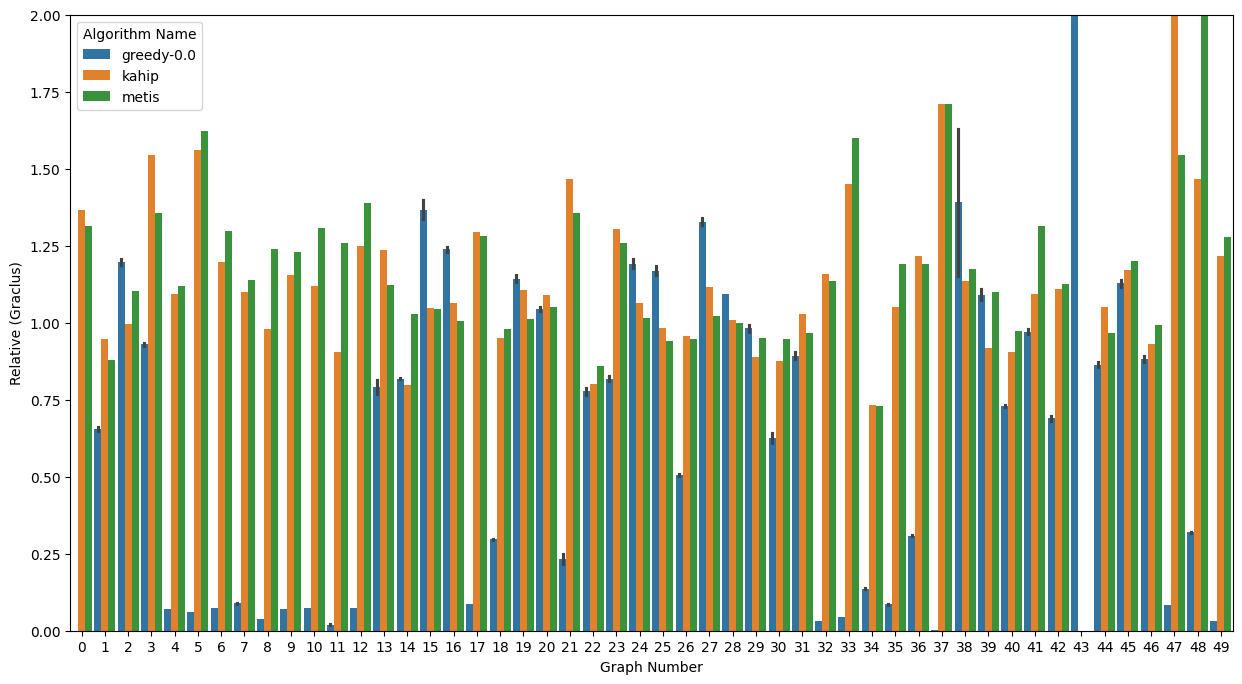

In [746]:
plt.figure(figsize=(15,8))
barplot = sns.barplot(df[(df['Algorithm Name'] != 'graclus') & (df['Parts'] == 32)], y='Relative (Graclus)', x='Graph Number', errorbar='se', hue='Algorithm Name', estimator='mean', hue_order=['greedy-0.0', 'kahip', 'metis'],width=0.9)
barplot.set_ylim(bottom=0, top=2)
fig = barplot.get_figure()
fig.savefig("comparison-barplot-mean.pdf") 
barplot

<Axes: xlabel='Graph Number', ylabel='Relative (Graclus)'>

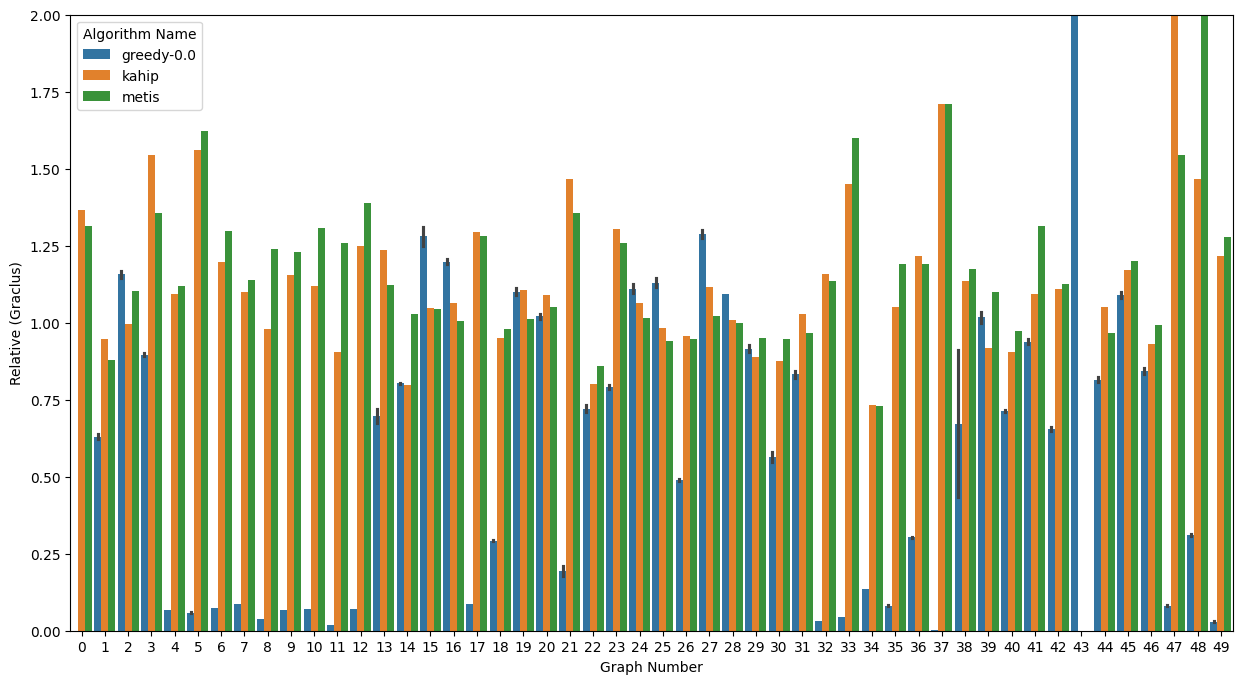

In [747]:
plt.figure(figsize=(15,8))
barplot = sns.barplot(df[(df['Algorithm Name'] != 'graclus') & (df['Parts'] == 32)], y='Relative (Graclus)', x='Graph Number', errorbar='se', hue='Algorithm Name', estimator='min', hue_order=['greedy-0.0', 'kahip', 'metis'], width=0.9)
barplot.set_ylim(bottom=0, top=2)
fig = barplot.get_figure()
fig.savefig("comparison-barplot-minimum-32.pdf") 
barplot

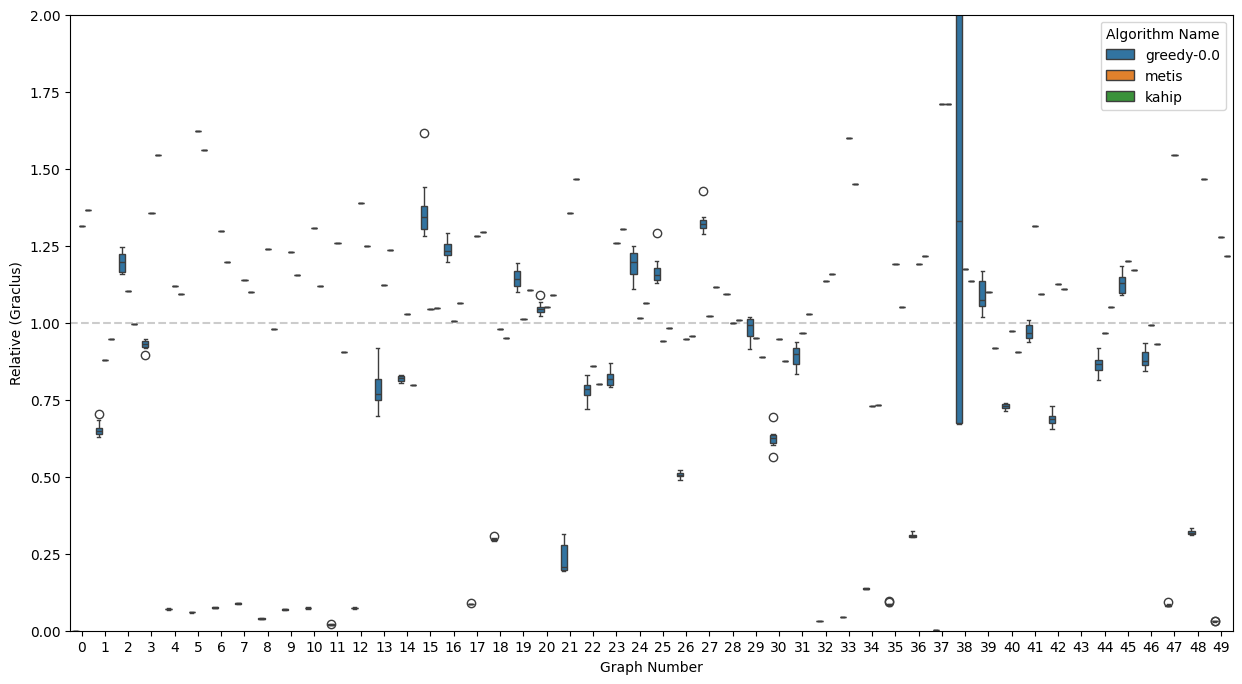

In [763]:
plt.figure(figsize=(15,8))
boxplot = sns.boxplot(df[(df['Algorithm Name'] != 'graclus') & (df['Parts'] == 32)], x='Graph Number', y='Relative (Graclus)', hue = 'Algorithm Name')
boxplot.set_ylim(bottom = 0, top = 2)
boxplot.axhline(1.0, color='black', linestyle='--', zorder=0, alpha=0.2)

# Threshold Experiment

In [666]:
def read_threshold_experiments(filename):
    df_hierarchy = pd.read_csv(filename, 
                 sep = ',', 
                 header = 0, 
                 names = ['Graph Name', 
                          'Experiment Type', 
                          'Phi', 
                          'Potential', 
                          'Parts',
                          'Time (decomp)',
                          'Time (solve)', 
                          'Value (mid)',
                          'Value'], 
                 dtype = {
                     'Graph Name': str,
                     'Experiment Type': int,
                     'Phi': float,
                     'Potential': float,
                     'Parts': int,
                     'Time (decomp)': int,
                     'Time (solve)': int,
                     'Value (mid)': float,
                     'Value': float,
                 },
                )

    

    df_hierarchy['Experiment Type'] = df_hierarchy['Experiment Type'].map(experiment_types)
    df_hierarchy['Time'] = (df_hierarchy['Time (decomp)'] + df_hierarchy['Time (solve)']) / 1000.0
    df_hierarchy['Parts'] = df_hierarchy['Parts'].astype('category')
    df_hierarchy['Potential'] = df_hierarchy['Potential'].astype('category')
    #df_hierarchy['Algorithm Name'] = df_hierarchy['Potential'].astype(str)
    #df_hierarchy['Type'] = df_hierarchy['Graph Name'].map(graph_type)
    #df_hierarchy['Graph Number'] = df_hierarchy['Graph Name'].map(graph_number)

    return df_hierarchy

In [667]:
df_threshold = read_threshold_experiments('./data/potential-experiments-30-jan-final.csv')

In [608]:
df_threshold

Graph Name Experiment Type  Phi  Potential Parts  \
0     vsp_bcsstk30_500sep_10in_1Kout          greedy    0        100     2   
1     vsp_bcsstk30_500sep_10in_1Kout          greedy    0        100     4   
2     vsp_bcsstk30_500sep_10in_1Kout          greedy    0        100     8   
3     vsp_bcsstk30_500sep_10in_1Kout          greedy    0        100    16   
4     vsp_bcsstk30_500sep_10in_1Kout          greedy    0        100    32   
...                              ...             ...  ...        ...   ...   
1675               coAuthorsCiteseer          greedy    0      1e-09     8   
1676               coAuthorsCiteseer          greedy    0      1e-09    16   
1677               coAuthorsCiteseer          greedy    0      1e-09    32   
1678               coAuthorsCiteseer          greedy    0      1e-09    64   
1679               coAuthorsCiteseer          greedy    0      1e-09   128   

      Time (decomp)  Time (solve)  Value (mid)     Value  Time  
0                45            16            1  0.600001 0.061  
1                45            30            3   2.85613 0.075  
2                45            26            7   6.91141 0.071  
3                45            45           15     14.86  0.09  
4                45            30           31   30.8852 0.075  
...             ...           ...          ...       ...   ...  
1675           2708            85    0.0181781 0.0181641 2.793  
1676           2708           127    0.0663265 0.0663265 2.835  
1677           2708           240     0.187442  0.180388 2.948  
1678           2708           507     0.531231  0.521644 3.215  
1679           2708          1089      1.46589   1.43693 3.797  

[1680 rows x 10 columns]

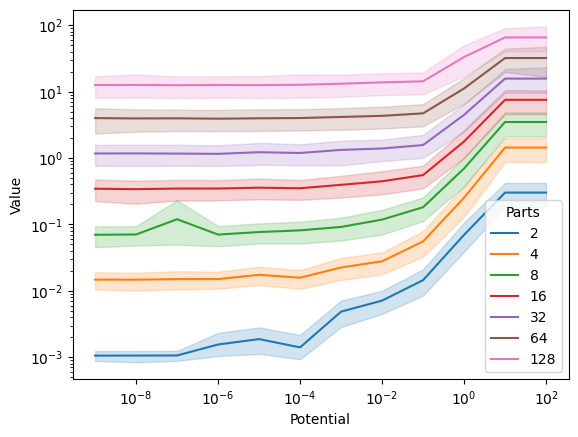

In [609]:
lineplot = sns.lineplot(data=df_threshold[df_threshold['Potential'] <= 1000.0], x='Potential', y='Value', hue='Parts', estimator='mean')
plt.xscale('log')
plt.yscale('log')

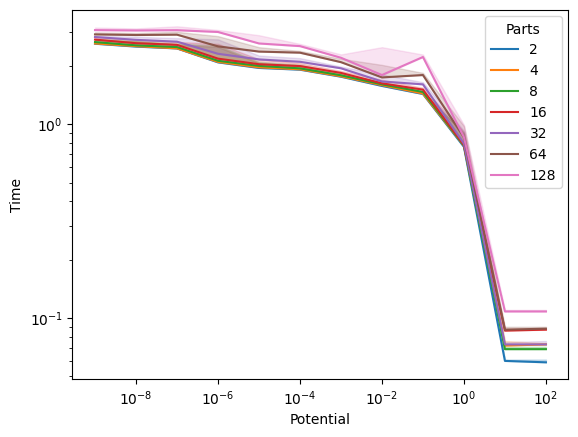

In [610]:
lineplot = sns.lineplot(data=df_threshold, x='Potential', y='Time', hue='Parts', estimator='min')
plt.xscale('log')
plt.yscale('log')

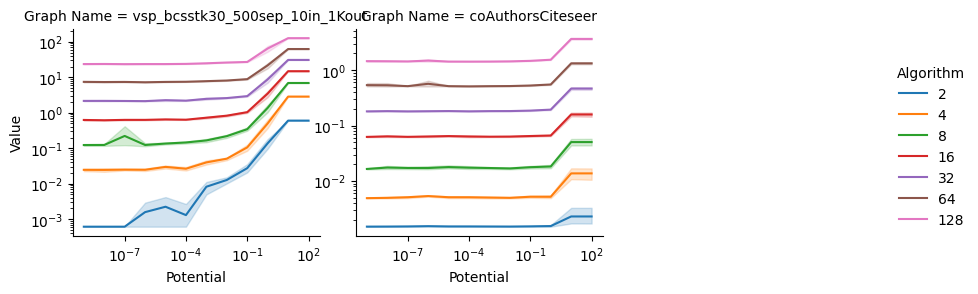

In [611]:
g = sns.FacetGrid(df_threshold, col = 'Graph Name', hue='Parts', sharey = False, sharex = False, col_wrap=3)
g.map(sns.lineplot, 'Potential', 'Value')
g.set(xscale='log', yscale='log')
g.add_legend(title='Algorithm')
fig = g.fig
fig.savefig("potential-experiments.pdf") 
g

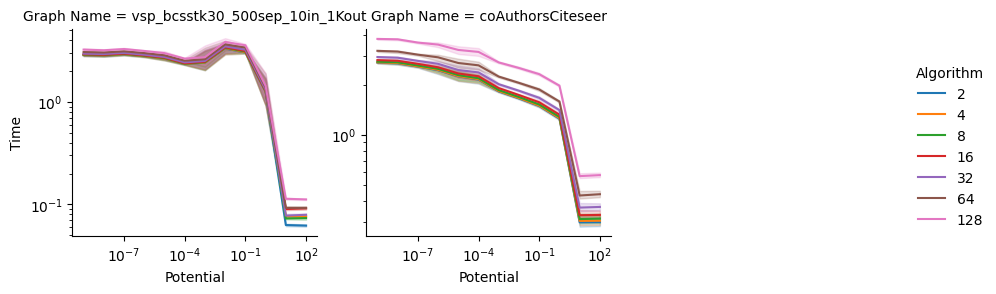

In [655]:
g = sns.FacetGrid(df_threshold, col = 'Graph Name', hue='Parts', sharey = False, sharex = False, col_wrap=3)
g.map(sns.lineplot, 'Potential', 'Time')
g.set(xscale='log', yscale='log')
g.add_legend(title='Algorithm')
fig = g.fig
fig.savefig("potential-experiments-time.pdf") 
g

In [652]:
df_threshold

Graph Name Experiment Type  Phi  Potential Parts  \
0     vsp_bcsstk30_500sep_10in_1Kout          greedy    0        100     2   
1     vsp_bcsstk30_500sep_10in_1Kout          greedy    0        100     4   
2     vsp_bcsstk30_500sep_10in_1Kout          greedy    0        100     8   
3     vsp_bcsstk30_500sep_10in_1Kout          greedy    0        100    16   
4     vsp_bcsstk30_500sep_10in_1Kout          greedy    0        100    32   
...                              ...             ...  ...        ...   ...   
1675               coAuthorsCiteseer          greedy    0      1e-09     8   
1676               coAuthorsCiteseer          greedy    0      1e-09    16   
1677               coAuthorsCiteseer          greedy    0      1e-09    32   
1678               coAuthorsCiteseer          greedy    0      1e-09    64   
1679               coAuthorsCiteseer          greedy    0      1e-09   128   

      Time (decomp)  Time (solve)  Value (mid)     Value  Time  
0                45            16            1  0.600001 0.061  
1                45            30            3   2.85613 0.075  
2                45            26            7   6.91141 0.071  
3                45            45           15     14.86  0.09  
4                45            30           31   30.8852 0.075  
...             ...           ...          ...       ...   ...  
1675           2708            85    0.0181781 0.0181641 2.793  
1676           2708           127    0.0663265 0.0663265 2.835  
1677           2708           240     0.187442  0.180388 2.948  
1678           2708           507     0.531231  0.521644 3.215  
1679           2708          1089      1.46589   1.43693 3.797  

[1680 rows x 10 columns]

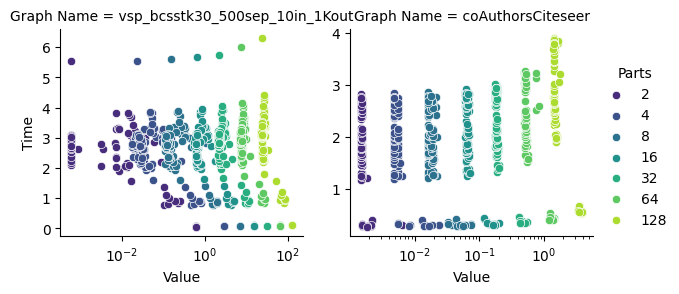

In [678]:
g = sns.FacetGrid(df_threshold, col='Graph Name', hue='Parts', palette='viridis', sharex = False, sharey = False)
g.map(sns.scatterplot, 'Value', 'Time',)# 'Potential')# style='Parts', marker={'2': 'x', '4': 'x', '8': 'x', '16': 'x', '32': 'x', '64': 'x', '128': 'x'})
g.set(xscale='log')
g.add_legend()


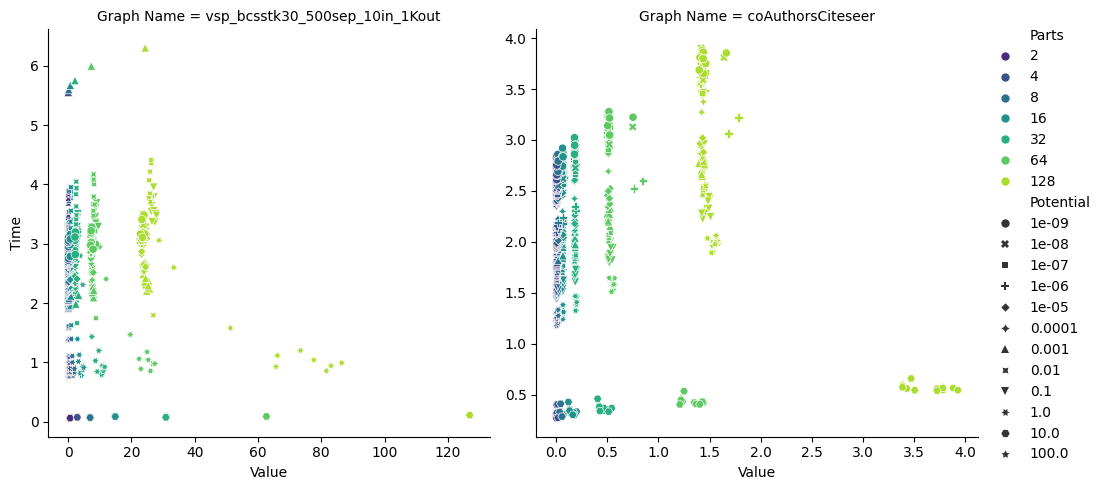

In [697]:
plot = sns.relplot(
    data=df_threshold, 
    x='Value', 
    y='Time', 
    hue='Parts', 
    palette='viridis',
    style='Potential', 
    col='Graph Name', 
    facet_kws={
        'sharex': False, 
        'sharey': False}
)
fig = plot.fig
fig.savefig("potential_pareto.pdf")


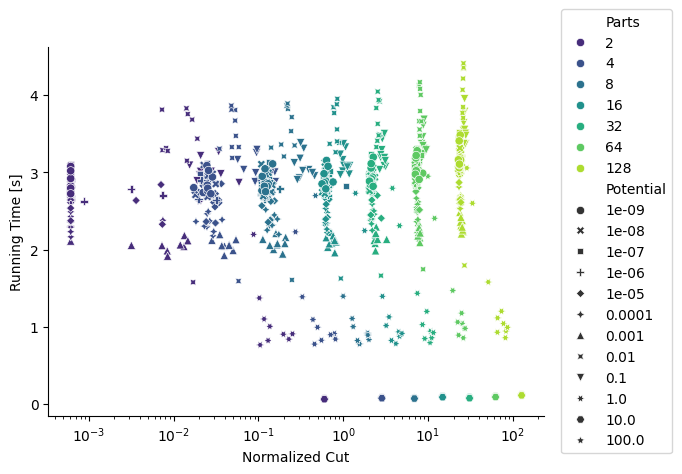

In [715]:
plot = sns.scatterplot(
    data=df_threshold[(df_threshold['Graph Name'] == 'vsp_bcsstk30_500sep_10in_1Kout') & (df_threshold['Time'] < 5)], 
    x='Value', 
    y='Time', 
    hue='Parts', 
    palette='viridis',
    style='Potential', 
)
sns.despine()
plt.xscale('log')
plt.xlabel('Normalized Cut')
plt.ylabel('Running Time [s]')
plt.legend(bbox_to_anchor=(1.02, 0.5), loc='center left')
fig = plot.get_figure()
fig.savefig("potential_pareto_single.pdf", bbox_inches='tight')

# Comparison Table with Zhao et al.

In [602]:
df = read_hierarchy_experiments('./data/hierarchy-experiments-autotune-zhao-31-jan.csv')

In [603]:
comparison_table_ours = df.groupby(['Graph Name']).agg({'Value': ['mean', 'min'], 'Time': ['mean', 'min']}).reset_index()
comparison_table_ours.columns = ['Graph Name', 'Cut (mean)', 'Cut (min)', 'Time (mean)', 'Time (min)']

In [604]:
zhao = { 'Graph Name': ['fe_rotor', 'fe_tooth', 'auto', 'wing_nodal', 'luxembourg_osm', 'mi2010', 'uk', 'smallworld', 'vsp_barth5_1Ksep_50in_5Kout', 'vsp_befref_fxm_2_4_air02', 'vsp_bump2_e18_aa01_model1_crew1', 'vsp_p0291_seymourl_iiasa', 'vsp_model1_crew1_cr42_south31', 'vsp_vibrobox_scagr7-2c_rlfddd', 'vsp_bcsstk30_500sep_10in_1Kout', 'coAuthorsDBLP', 'coAuthorsCiteseer', 'citationCiteseer', 'coPapersDBLP', 'coPapersCiteseer', 'appu'],
           'Cut (Zhao)': [1.50, 1.68, 1.08, 4.71, 0.07, 0.41, 1.05, 7.05, 2.72, 12.83, 13.55, 7.88, 10.48, 6.85, 2.09, 0.49, 0.41, 0.52, 0.14, 0.06, 23.80], 
           'Time (Zhao)': [1.30 + 5.4, 0.94 + 4.0, 14.81 + 29.0, 0.21 + 1.5, 0.86 + 3.8, 2.94 + 10.2, 0.22 + 0.6, 32.20 + 14.1, 0.46 + 2.7, 0.24 + 1.8, 0.91 + 5.4, 0.67 + 1.3, 0.70 + 4.9, 2.65 + 4.8, 2.26 + 25.7, 30.71 + 26.5, 8.20 + 13.3, 32.32 + 24.8, 52.83 + 61.6, 16.41 + 51.6, 25.53 + 2]}
df_zhao = pd.DataFrame(zhao) 

In [605]:
comparison_table = pd.merge(comparison_table_ours, df_zhao, on='Graph Name')

In [597]:
print(
    comparison_table.to_latex(
        float_format='%.2f', 
        index=False, 
        caption="Cut values and running time of our Algorithm vs the values reported by Zhao et al.", 
        label='tab:zhao')
)


\begin{table}
\caption{Cut values and running time of our Algorithm vs the values reported by Zhao et al.}
\label{tab:zhao}
\begin{tabular}{lrrrrrr}
\toprule
Graph Name & Cut (mean) & Cut (min) & Time (mean) & Time (min) & Cut (Zhao) & Time (Zhao) \\
\midrule
appu & 28.98 & 28.98 & 0.14 & 0.13 & 23.80 & 27.53 \\
auto & 1.45 & 1.39 & 35.50 & 34.56 & 1.08 & 43.81 \\
citationCiteseer & 0.31 & 0.29 & 14.38 & 13.06 & 0.52 & 57.12 \\
coAuthorsCiteseer & 0.17 & 0.16 & 3.12 & 3.05 & 0.41 & 21.50 \\
coAuthorsDBLP & 0.27 & 0.27 & 5.83 & 5.50 & 0.49 & 57.21 \\
coPapersCiteseer & 0.04 & 0.04 & 29.27 & 27.36 & 0.06 & 68.01 \\
coPapersDBLP & 0.13 & 0.13 & 49.49 & 43.78 & 0.14 & 114.43 \\
fe_rotor & 1.58 & 1.55 & 2.75 & 2.66 & 1.50 & 6.70 \\
fe_tooth & 2.06 & 1.96 & 1.59 & 1.53 & 1.68 & 4.94 \\
luxembourg_osm & 0.06 & 0.06 & 0.47 & 0.46 & 0.07 & 4.66 \\
mi2010 & 0.17 & 0.16 & 3.13 & 3.08 & 0.41 & 13.14 \\
smallworld & 6.00 & 5.87 & 4.41 & 4.22 & 7.05 & 46.30 \\
uk & 0.87 & 0.77 & 0.02 & 0.02 & 1.05 &

In [601]:
comparison_table_reorder = comparison_table[['Graph Name', 'Cut (mean)', 'Cut (min)', 'Cut (Zhao)', 'Time (mean)', 'Time (min)', 'Time (Zhao)']]
print(
    comparison_table_reorder.to_latex(
        float_format='%.2f', 
        index=False, 
        caption="Cut values and running time of our Algorithm vs the values reported by Zhao et al.", 
        label='tab:zhao')
)


\begin{table}
\caption{Cut values and running time of our Algorithm vs the values reported by Zhao et al.}
\label{tab:zhao}
\begin{tabular}{lrrrrrr}
\toprule
Graph Name & Cut (mean) & Cut (min) & Cut (Zhao) & Time (mean) & Time (min) & Time (Zhao) \\
\midrule
appu & 28.98 & 28.98 & 23.80 & 0.14 & 0.13 & 27.53 \\
auto & 1.45 & 1.39 & 1.08 & 35.50 & 34.56 & 43.81 \\
citationCiteseer & 0.31 & 0.29 & 0.52 & 14.38 & 13.06 & 57.12 \\
coAuthorsCiteseer & 0.17 & 0.16 & 0.41 & 3.12 & 3.05 & 21.50 \\
coAuthorsDBLP & 0.27 & 0.27 & 0.49 & 5.83 & 5.50 & 57.21 \\
coPapersCiteseer & 0.04 & 0.04 & 0.06 & 29.27 & 27.36 & 68.01 \\
coPapersDBLP & 0.13 & 0.13 & 0.14 & 49.49 & 43.78 & 114.43 \\
fe_rotor & 1.58 & 1.55 & 1.50 & 2.75 & 2.66 & 6.70 \\
fe_tooth & 2.06 & 1.96 & 1.68 & 1.59 & 1.53 & 4.94 \\
luxembourg_osm & 0.06 & 0.06 & 0.07 & 0.47 & 0.46 & 4.66 \\
mi2010 & 0.17 & 0.16 & 0.41 & 3.13 & 3.08 & 13.14 \\
smallworld & 6.00 & 5.87 & 7.05 & 4.41 & 4.22 & 46.30 \\
uk & 0.87 & 0.77 & 1.05 & 0.02 & 0.02 &